In [1]:
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
from gdeltdoc import GdeltDoc, Filters, near, repeat

In [2]:
df_stock = yf.download("NVDA", start="2020-01-01", end="2020-12-31", interval='1d'); df_stock.shape[0]

[*********************100%***********************]  1 of 1 completed


253

In [3]:
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,230.899994,235.679993,230.130005,235.300003,234.912384,5775100
2020-01-02,238.750000,239.910004,236.720001,239.910004,239.514771,5938400
2020-01-03,235.100006,237.830002,234.100006,236.070007,235.681122,5134600
2020-01-06,232.320007,237.270004,231.270004,237.059998,236.669479,6565900
2020-01-07,238.199997,241.770004,236.389999,239.929993,239.534729,7871400


In [4]:
df_stock.shape[0]

253

In [5]:
df_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df_stock = df_stock.groupby(pd.Grouper(level="Date", freq="1D")).mean(); 
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,230.899994,235.679993,230.130005,235.300003,234.912384,5775100.0
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,238.750000,239.910004,236.720001,239.910004,239.514771,5938400.0
2020-01-03,235.100006,237.830002,234.100006,236.070007,235.681122,5134600.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
features = [
    'nvidia', 'geforce', 'geforce rtx', 'geForce now', 'nvidia rtx', 'nvidia shield', 'nvidia dgx'
]

In [8]:
for ft in features:
    f = Filters(
        start_date = "2020-01-01",
        end_date = "2020-12-31",
        num_records = 250,
        keyword = ft,
    #     domain = ["bbc.co.uk", "nytimes.com", "cnn.com"],
    #     country = ["UK", "US"],
    #     theme = "ECON_STOCKMARKET",

    #     near = near(3, "amazon", "stock"),
    #     repeat = repeat(3, "stock")
    )
    gd = GdeltDoc()
    # Get a timeline of the number of articles matching the filters
    timelinetone = gd.timeline_search("timelinetone", f)
    timelinetone = timelinetone.groupby(pd.Grouper(key="datetime", freq="1D")).mean()
    
    timelinevolraw = gd.timeline_search("timelinevolraw", f)
    timelinevolraw = timelinevolraw.groupby(pd.Grouper(key="datetime", freq="1D")).sum()

    
    df_stock[f'{ft}_av_tone'] = timelinetone['Average Tone'].values
    df_stock[f'{ft}_art_count'] = timelinevolraw['Article Count'].values

In [9]:
df_stock.head()

,Open,High,Low,Close,Adj Close,Volume,nvidia_av_tone,nvidia_art_count,geforce_av_tone,geforce_art_count,geforce rtx_av_tone,geforce rtx_art_count,geForce now_av_tone,geForce now_art_count,nvidia rtx_av_tone,nvidia rtx_art_count,nvidia shield_av_tone,nvidia shield_art_count,nvidia dgx_av_tone,nvidia dgx_art_count
Date,,,,,,,,,,,,,,,,,,,,
2019-12-31,230.899994,235.679993,230.130005,235.300003,234.912384,5775100.0,1.0359,51,1.5948,17,0.2078,9,4.9096,1,0.8517,2,1.5636,5,0.0,0
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,2.2550,162,2.3535,28,2.0293,9,1.0598,3,1.8241,7,1.3161,2,0.0,0
2020-01-02,238.750000,239.910004,236.720001,239.910004,239.514771,5938400.0,1.4056,137,1.6154,41,2.4946,11,1.7071,1,1.4843,11,1.4987,2,0.0,0
2020-01-03,235.100006,237.830002,234.100006,236.070007,235.681122,5134600.0,1.7423,78,2.4552,24,2.8440,11,1.8624,2,1.2565,9,0.0000,0,0.0,0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,1.8434,91,1.6137,48,1.2763,20,1.4035,1,1.7116,22,0.0000,0,0.0,0


In [10]:
df_stock.shape[0]

366

In [11]:
for c in df_stock.columns:
    df_stock = df_stock[df_stock[c].notna() != False]

In [12]:
df_stock.shape[0]

252

In [29]:
df_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'nvidia_av_tone',
       'nvidia_art_count', 'geforce_av_tone', 'geforce_art_count',
       'geforce rtx_av_tone', 'geforce rtx_art_count', 'geForce now_av_tone',
       'geForce now_art_count', 'nvidia rtx_av_tone', 'nvidia rtx_art_count',
       'nvidia shield_av_tone', 'nvidia shield_art_count',
       'nvidia dgx_av_tone', 'nvidia dgx_art_count'],
      dtype='object')

# 

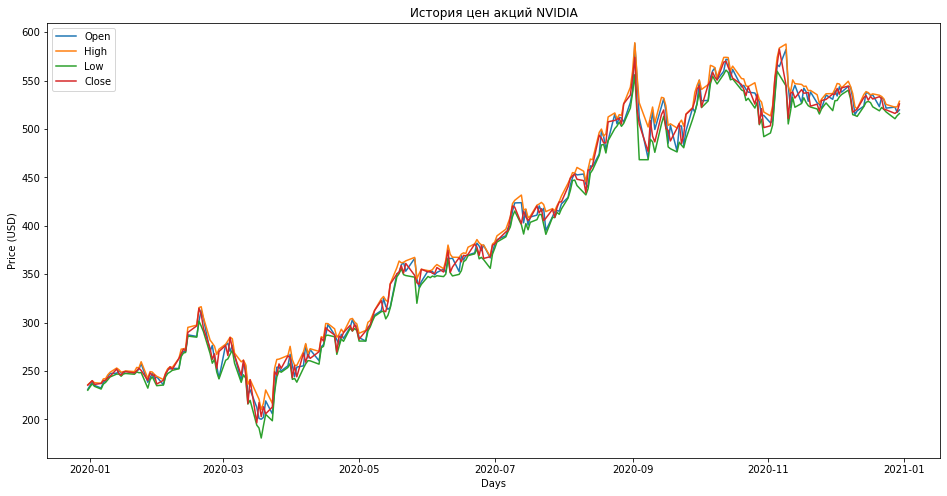

In [48]:
%matplotlib inline

plt.figure(figsize=(16, 8))

plt.plot(df_stock["Open"])
plt.plot(df_stock["High"])
plt.plot(df_stock["Low"])
plt.plot(df_stock["Close"])
plt.title('История цен акций NVIDIA')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

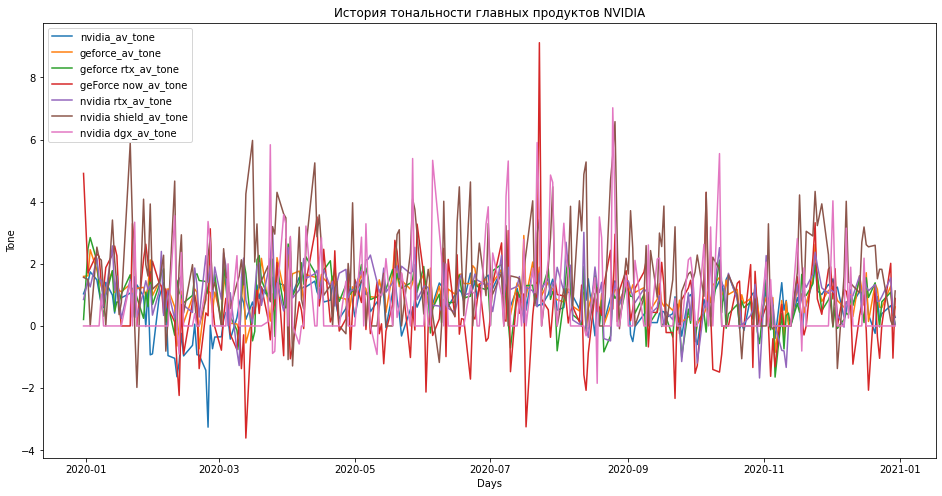

In [49]:
%matplotlib inline

tone_columns = [e for e in df_stock.columns if 'tone' in e]

plt.figure(figsize=(16, 8))

for tc in tone_columns:
    plt.plot(df_stock[tc])
    
plt.title('История тональности главных продуктов NVIDIA')
plt.ylabel('Tone')
plt.xlabel('Days')
plt.legend(tone_columns, loc='upper left')
plt.show()

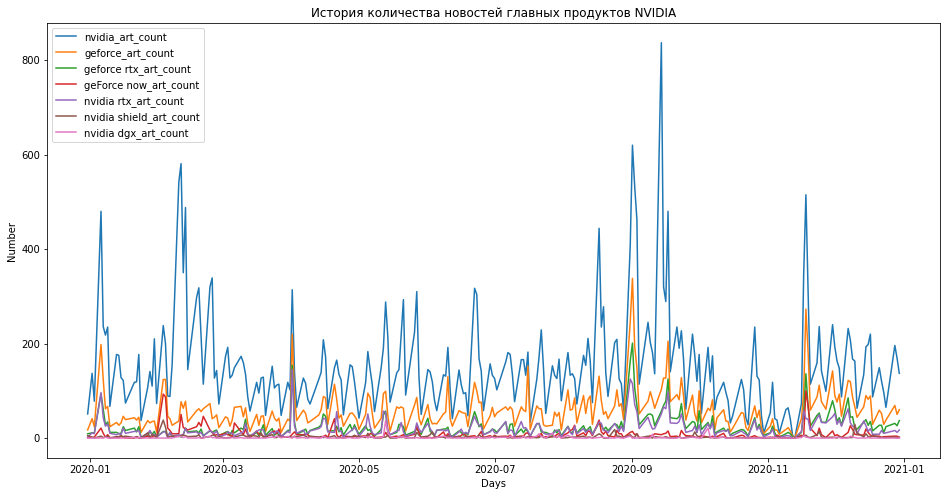

In [50]:
%matplotlib inline

news_count_columns = [e for e in df_stock.columns if 'count' in e]

plt.figure(figsize=(16, 8))

for nc in news_count_columns:
    plt.plot(df_stock[nc])
    
plt.title('История количества новостей главных продуктов NVIDIA')
plt.ylabel('Number')
plt.xlabel('Days')
plt.legend(news_count_columns, loc='upper left')
plt.show()